In [13]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

#### Options
- For call options, the strike price is where the security can be bought by the option holder;
- For put options, the strike price is the price at which the security can be sold. 

In [14]:
FILE_NAME = "data/$spx-options-exp-2022-09-07-weekly-show-all-stacked-09-07-2022.csv"

df = pd.read_csv(FILE_NAME)
df.drop(df.tail(1).index,inplace=True)
df.tail(3)

,Strike,Moneyness,Bid,Midpoint,Ask,Last,Change,%Chg,Volume,Open Int,Volume Open Interest Ratio,IV,Type,Time,Avg IV
"4,800.00",+21.51%,843.80,846.65,849.50,894.50,0.0,unch,0,3,160.32%,Put,09/06/22,13.20%,width: 1%,width: 1%
"5,000.00",+26.58%,"1,045.40","1,048.30","1,051.20",0.00,0.0,unch,0,0,125.97%,Put,NaN,13.20%,width: 1%,width: 1%
"5,200.00",+31.64%,"1,244.00","1,247.35","1,250.70",0.00,0.0,unch,0,0,235.95%,Put,NaN,13.20%,width: 1%,width: 1%


In [15]:
open_int_call = df['Open Int'].where(df['Volume Open Interest Ratio']=='Call')
open_int_put = df['Open Int'].where(df['Volume Open Interest Ratio']=='Put')


df.index = df.index.str.replace(',','').astype(float)
df.index = df.index.where( df.index > 3000.0).where(df.index < 4500.0 )

# open_int_put =
strike_call = df.index.where(df['Volume Open Interest Ratio']=='Call')
strike_put = df.index.where(df['Volume Open Interest Ratio']=='Put')

In [16]:
def process_open_interest(data):
    data = data.str.replace('%','')
    return data.str.replace('+','').astype(float)#.map({'%':' '})#

open_int_call = process_open_interest(open_int_call)
open_int_put = process_open_interest(open_int_put)

/tmp/ipykernel_509936/2133080149.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  return data.str.replace('+','').astype(float)#.map({'%':' '})#


In [17]:
print( open_int_put.size, strike_put.size )
print( open_int_call.shape, strike_call.shape )

350 350
(350,) (350,)


Text(0, 0.5, 'number of open contracts')

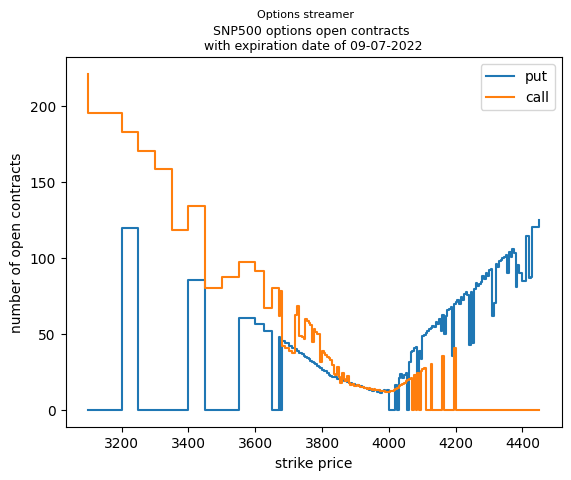

In [18]:
plt.step(strike_put, open_int_put )
plt.step(strike_call, open_int_call )
plt.suptitle('Options streamer',size=8)

plt.title(f'''SNP500 options open contracts 
with expiration date of 09-07-2022''',size=9)
plt.legend(['put','call'])
plt.xlabel('strike price')
plt.ylabel('number of open contracts')